# 6. Quiz

### 어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다. 현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인원의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오.
주의) 사전 작업으로 아래 코드 셀을 먼저 실행하시오

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' 
matplotlib.rcParams['font.size'] = 10 
matplotlib.rcParams['axes.unicode_minus'] = False

### 1) QuizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원(total), 식수 인원(reception)을 각각의 변수로 저장하시오.

In [16]:
dataset = pd.read_csv('QuizData.csv')
dataset[:5]

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92


In [17]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
X, Y

(array([[118],
        [253],
        [320],
        [ 94],
        [155],
        [188],
        [201],
        [338],
        [186],
        [183],
        [223],
        [392],
        [ 86],
        [112],
        [129],
        [223],
        [288],
        [262],
        [143],
        [179]], dtype=int64),
 array([ 62, 148, 201,  80,  92, 131, 147, 187, 124, 152, 143, 199,  58,
         68,  76, 149, 152, 183,  88, 101], dtype=int64))

### 2) 전체 데이터를 훈련 세트와 테스트 세트로 분리하시오. 이 때 비율은 75 : 25 로 합니다.

(단, random_state = 0 으로 설정)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

### 3) 훈련 세트를 이용하여 단순 선형 회귀 (Simple Linear Regression) 모델을 생성하시오.

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

### 4) 데이터 시각화 (훈련 세트) 코드를 작성하시오.

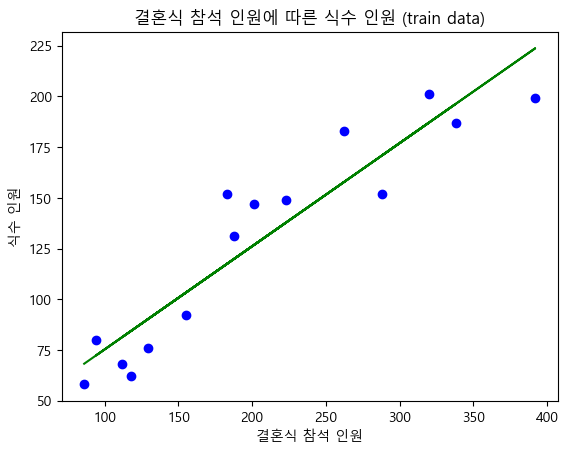

In [20]:
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('결혼식 참석 인원에 따른 식수 인원 (train data)')
plt.xlabel('결혼식 참석 인원')
plt.ylabel('식수 인원')
plt.show()

### 5) 데이터 시각화 (테스트 세트) 코드를 작성하시오.

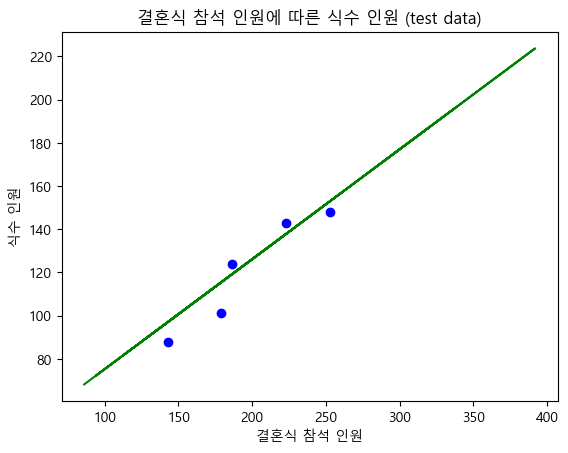

In [21]:
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
# plot을 만들때 X_test를 이용해서 코드를 작성해도 똑같은 기울기와 y절편의 그래프가 그려지지만
# 현재 테스트 세트의 분포가 낮은 값 위주이기 때문에
# matplotlib은 자동으로 xlim과 ylim을 테스트 데이터에 맞추기 때문에
# 따로 xlim ylim을 설정하지 않으면 scale이 달라져서 그래프가 다른것 처럼 보임
# 그래서 plot은 그냥 훈련 데이터로 만든 것을 그대로 쓰고
# scatter에만 테스트 데이터를 넣어서 훈련 데이터의 산점도와 비교해보면 좋음
plt.title('결혼식 참석 인원에 따른 식수 인원 (test data)')
plt.xlabel('결혼식 참석 인원')
plt.ylabel('식수 인원')
plt.show()

### 6) 훈련 세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오.

In [22]:
reg.score(X_train, Y_train)

0.8707088403321211

In [23]:
reg.score(X_test, Y_test)

0.8634953212566615

### 7) 결혼식 참석 인원이 300명일 때 예상되는 식수 인원을 구하시오.

In [24]:
reg.predict([[300]])

array([176.92793218])

In [27]:
pred_300 = reg.predict([[300]])
print('결혼식 참석 인원 300명에 대한 예상 식수 인원은 {0}명입니다.'.format(int(pred_300[0]) + 1))

결혼식 참석 인원 300명에 대한 예상 식수 인원은 177명입니다.


In [28]:
pred_300 = reg.predict([[300]])
print('결혼식 참석 인원 300명에 대한 예상 식수 인원은 {0}명입니다.'.format(np.around(pred_300[0]).astype(int)))

결혼식 참석 인원 300명에 대한 예상 식수 인원은 177명입니다.
